In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [5]:
ticker = 'AAPL'
data = yf.download(ticker, start="2010-01-01", end="2024-09-24")

[*********************100%%**********************]  1 of 1 completed


In [6]:
# Preview the data
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-17,215.750000,216.899994,214.500000,216.789993,216.789993,45519300
2024-09-18,217.550003,222.710007,217.539993,220.690002,220.690002,59894900
2024-09-19,224.990005,229.820007,224.630005,228.869995,228.869995,66781300
2024-09-20,229.970001,233.089996,227.619995,228.199997,228.199997,318679900
2024-09-23,227.339996,229.449997,225.809998,226.470001,226.470001,54146000


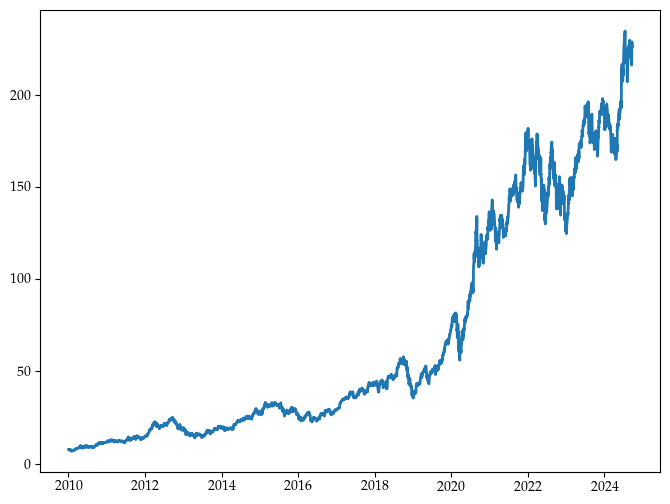

In [13]:
plt.figure(figsize=(8,6))
plt.plot(data['Close'], lw = 2)
plt.show()

# Generate Features

In [14]:
# Calculate some technical indicators using the 'ta' library
data['SMA50'] = ta.trend.sma_indicator(data['Close'], window=50)
data['SMA200'] = ta.trend.sma_indicator(data['Close'], window=200)
data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
data['MACD'] = ta.trend.macd_diff(data['Close'])
data['Volatility'] = data['Close'].rolling(window=20).std()

In [15]:
data.head(200)

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,RSI,MACD,Volatility
Date,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465666,601904800,NaN,NaN,NaN,NaN,NaN
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000,NaN,NaN,NaN,NaN,NaN
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200,NaN,NaN,NaN,NaN,NaN
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2010-10-12,10.550357,10.696429,10.446071,10.662143,9.003915,558544000,9.524721,NaN,73.521580,0.008290,0.253090
2010-10-13,10.721429,10.784286,10.707143,10.719286,9.052170,630092400,9.552014,NaN,74.598133,0.014637,0.238743
2010-10-14,10.774643,10.802500,10.728571,10.796786,9.117617,435296400,9.580107,NaN,76.022033,0.020242,0.246660


In [16]:
# Drop any rows with missing values
data = data.dropna()

In [17]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,RSI,MACD,Volatility
Date,,,,,,,,,,,
2010-10-18,11.373929,11.392857,11.224643,11.357143,9.590826,1093010800,9.659357,8.767198,83.388449,0.068277,0.359033
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.334164,1232784000,9.693457,8.784248,70.061930,0.054880,0.374606
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.365533,721624400,9.729971,8.801418,70.678640,0.042987,0.392959
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.335070,551460000,9.772350,8.819016,69.188061,0.027891,0.405436
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.273242,372778000,9.812121,8.836318,66.139105,0.009145,0.413835


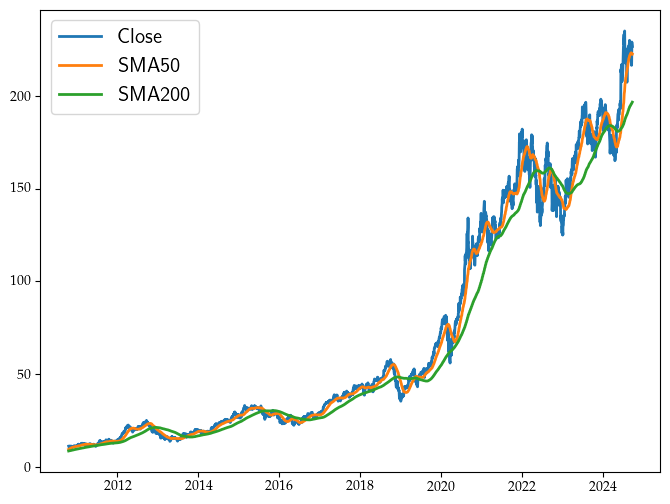

In [19]:
plt.figure(figsize=(8,6))
plt.plot(data['Close'], lw = 2, label = 'Close')
plt.plot(data['SMA50'], lw = 2, label = 'SMA50')
plt.plot(data['SMA200'], lw = 2, label = 'SMA200')
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.show()

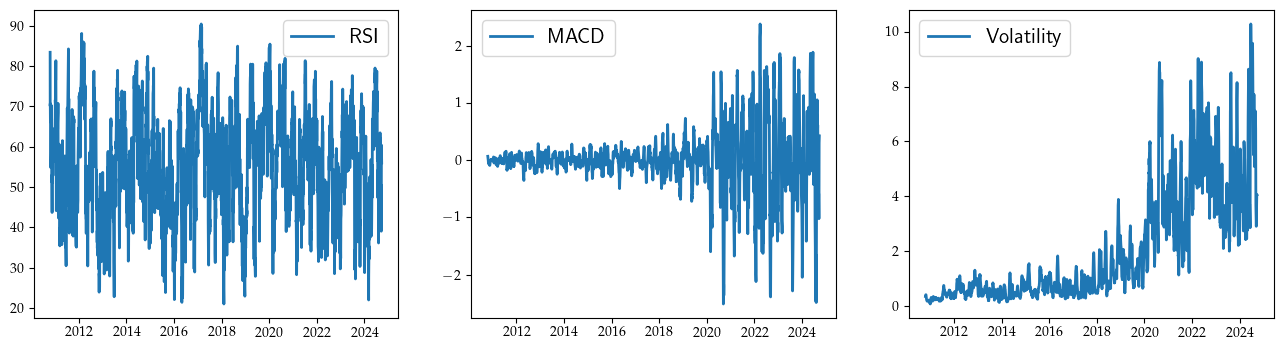

In [37]:
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.plot(data['RSI'], lw = 2, label = 'RSI')
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})

plt.subplot(132)
plt.plot(data['MACD'], lw = 2, label = 'MACD')
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})

plt.subplot(133)
plt.plot(data['Volatility'], lw = 2, label = 'Volatility')
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})

plt.show()

In [20]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,RSI,MACD,Volatility
Date,,,,,,,,,,,
2010-10-18,11.373929,11.392857,11.224643,11.357143,9.590826,1093010800,9.659357,8.767198,83.388449,0.068277,0.359033
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.334164,1232784000,9.693457,8.784248,70.061930,0.054880,0.374606
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.365533,721624400,9.729971,8.801418,70.678640,0.042987,0.392959
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.335070,551460000,9.772350,8.819016,69.188061,0.027891,0.405436
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.273242,372778000,9.812121,8.836318,66.139105,0.009145,0.413835


In [28]:
# Create a target variable: 1 if price will go up, 0 if down
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

In [29]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,RSI,MACD,Volatility,Target
Date,,,,,,,,,,,,
2010-10-18,11.373929,11.392857,11.224643,11.357143,9.590826,1093010800,9.659357,8.767198,83.388449,0.068277,0.359033,0
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.334164,1232784000,9.693457,8.784248,70.061930,0.054880,0.374606,1
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.365533,721624400,9.729971,8.801418,70.678640,0.042987,0.392959,0
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.335070,551460000,9.772350,8.819016,69.188061,0.027891,0.405436,0
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.273242,372778000,9.812121,8.836318,66.139105,0.009145,0.413835,1


In [30]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,RSI,MACD,Volatility,Target
Date,,,,,,,,,,,,
2024-09-17,215.750000,216.899994,214.500000,216.789993,216.789993,45519300,222.667201,195.81225,40.125090,-1.021061,3.803357,1
2024-09-18,217.550003,222.710007,217.539993,220.690002,220.690002,59894900,222.507401,195.96595,48.256004,-0.800037,3.798280,1
2024-09-19,224.990005,229.820007,224.630005,228.869995,228.869995,66781300,222.425201,196.15410,60.402141,-0.098890,3.938805,0
2024-09-20,229.970001,233.089996,227.619995,228.199997,228.199997,318679900,222.437801,196.34795,59.176860,0.301875,4.071823,0
2024-09-23,227.339996,229.449997,225.809998,226.470001,226.470001,54146000,222.356401,196.51320,56.017060,0.425021,4.057614,0


In [31]:
# Drop rows with NaN target values after shifting
data = data.dropna()

# Machine Learning Part

In [63]:
# Features and target selection
X = data[['SMA50', 'SMA200', 'Volatility']] # , 'RSI', 'MACD'
y = data['Target']

In [64]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [65]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.09      0.15       337
           1       0.52      0.90      0.66       364

    accuracy                           0.51       701
   macro avg       0.48      0.49      0.40       701
weighted avg       0.48      0.51      0.41       701



### Grid Search

In [66]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       337
           1       0.52      0.99      0.68       364

    accuracy                           0.52       701
   macro avg       0.26      0.50      0.34       701
weighted avg       0.27      0.52      0.35       701



In [67]:
# Create a new column for the trading signal (1 for buy, -1 for sell, 0 for hold)
data['Signal'] = 0

In [68]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,RSI,MACD,Volatility,Target,Signal,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return,Peak,Drawdown
Date,,,,,,,,,,,,,,,,,,,
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.334164,1232784000,9.693457,8.784248,70.061930,0.054880,0.374606,1,0,-0.026761,-0.0,0.973239,1.0,1.0,0.0
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.365533,721624400,9.729971,8.801418,70.678640,0.042987,0.392959,0,0,0.003360,0.0,0.976509,1.0,1.0,0.0
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.335070,551460000,9.772350,8.819016,69.188061,0.027891,0.405436,0,0,-0.003252,-0.0,0.973333,1.0,1.0,0.0
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.273242,372778000,9.812121,8.836318,66.139105,0.009145,0.413835,1,0,-0.006623,-0.0,0.966887,1.0,1.0,0.0
2010-10-25,11.038929,11.128571,11.015714,11.030000,9.314562,392462000,9.854793,8.853614,67.179997,-0.003133,0.421414,0,0,0.004456,0.0,0.971195,1.0,1.0,0.0


In [69]:
data.loc[X_test.index, 'Signal'] = y_pred_best

In [70]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,RSI,MACD,Volatility,Target,Signal,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return,Peak,Drawdown
Date,,,,,,,,,,,,,,,,,,,
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.334164,1232784000,9.693457,8.784248,70.061930,0.054880,0.374606,1,0,-0.026761,-0.0,0.973239,1.0,1.0,0.0
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.365533,721624400,9.729971,8.801418,70.678640,0.042987,0.392959,0,0,0.003360,0.0,0.976509,1.0,1.0,0.0
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.335070,551460000,9.772350,8.819016,69.188061,0.027891,0.405436,0,0,-0.003252,-0.0,0.973333,1.0,1.0,0.0
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.273242,372778000,9.812121,8.836318,66.139105,0.009145,0.413835,1,0,-0.006623,-0.0,0.966887,1.0,1.0,0.0
2010-10-25,11.038929,11.128571,11.015714,11.030000,9.314562,392462000,9.854793,8.853614,67.179997,-0.003133,0.421414,0,0,0.004456,0.0,0.971195,1.0,1.0,0.0


In [71]:
data['Signal'] = data['Signal'].replace({0: np.nan})  # Replace 0s with NaN for cleaner visualization

In [72]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,RSI,MACD,Volatility,Target,Signal,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return,Peak,Drawdown
Date,,,,,,,,,,,,,,,,,,,
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.334164,1232784000,9.693457,8.784248,70.061930,0.054880,0.374606,1,NaN,-0.026761,-0.0,0.973239,1.0,1.0,0.0
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.365533,721624400,9.729971,8.801418,70.678640,0.042987,0.392959,0,NaN,0.003360,0.0,0.976509,1.0,1.0,0.0
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.335070,551460000,9.772350,8.819016,69.188061,0.027891,0.405436,0,NaN,-0.003252,-0.0,0.973333,1.0,1.0,0.0
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.273242,372778000,9.812121,8.836318,66.139105,0.009145,0.413835,1,NaN,-0.006623,-0.0,0.966887,1.0,1.0,0.0
2010-10-25,11.038929,11.128571,11.015714,11.030000,9.314562,392462000,9.854793,8.853614,67.179997,-0.003133,0.421414,0,NaN,0.004456,0.0,0.971195,1.0,1.0,0.0


In [73]:
# Forward fill signals to maintain positions
data['Signal'] = data['Signal'].ffill().fillna(0)  # 1 for buy/hold, -1 for sell

In [74]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,RSI,MACD,Volatility,Target,Signal,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return,Peak,Drawdown
Date,,,,,,,,,,,,,,,,,,,
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.334164,1232784000,9.693457,8.784248,70.061930,0.054880,0.374606,1,0.0,-0.026761,-0.0,0.973239,1.0,1.0,0.0
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.365533,721624400,9.729971,8.801418,70.678640,0.042987,0.392959,0,0.0,0.003360,0.0,0.976509,1.0,1.0,0.0
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.335070,551460000,9.772350,8.819016,69.188061,0.027891,0.405436,0,0.0,-0.003252,-0.0,0.973333,1.0,1.0,0.0
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.273242,372778000,9.812121,8.836318,66.139105,0.009145,0.413835,1,0.0,-0.006623,-0.0,0.966887,1.0,1.0,0.0
2010-10-25,11.038929,11.128571,11.015714,11.030000,9.314562,392462000,9.854793,8.853614,67.179997,-0.003133,0.421414,0,0.0,0.004456,0.0,0.971195,1.0,1.0,0.0


In [75]:
# Calculate the daily returns
data['Daily Return'] = data['Close'].pct_change()

In [76]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,RSI,MACD,Volatility,Target,Signal,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return,Peak,Drawdown
Date,,,,,,,,,,,,,,,,,,,
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.334164,1232784000,9.693457,8.784248,70.061930,0.054880,0.374606,1,0.0,NaN,-0.0,0.973239,1.0,1.0,0.0
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.365533,721624400,9.729971,8.801418,70.678640,0.042987,0.392959,0,0.0,0.003360,0.0,0.976509,1.0,1.0,0.0
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.335070,551460000,9.772350,8.819016,69.188061,0.027891,0.405436,0,0.0,-0.003252,-0.0,0.973333,1.0,1.0,0.0
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.273242,372778000,9.812121,8.836318,66.139105,0.009145,0.413835,1,0.0,-0.006623,-0.0,0.966887,1.0,1.0,0.0
2010-10-25,11.038929,11.128571,11.015714,11.030000,9.314562,392462000,9.854793,8.853614,67.179997,-0.003133,0.421414,0,0.0,0.004456,0.0,0.971195,1.0,1.0,0.0


In [77]:
# Calculate the strategy return by multiplying the signal by the daily return
data['Strategy Return'] = data['Daily Return'] * data['Signal'].shift(1)

In [78]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,RSI,MACD,Volatility,Target,Signal,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return,Peak,Drawdown
Date,,,,,,,,,,,,,,,,,,,
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.334164,1232784000,9.693457,8.784248,70.061930,0.054880,0.374606,1,0.0,NaN,NaN,0.973239,1.0,1.0,0.0
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.365533,721624400,9.729971,8.801418,70.678640,0.042987,0.392959,0,0.0,0.003360,0.0,0.976509,1.0,1.0,0.0
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.335070,551460000,9.772350,8.819016,69.188061,0.027891,0.405436,0,0.0,-0.003252,-0.0,0.973333,1.0,1.0,0.0
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.273242,372778000,9.812121,8.836318,66.139105,0.009145,0.413835,1,0.0,-0.006623,-0.0,0.966887,1.0,1.0,0.0
2010-10-25,11.038929,11.128571,11.015714,11.030000,9.314562,392462000,9.854793,8.853614,67.179997,-0.003133,0.421414,0,0.0,0.004456,0.0,0.971195,1.0,1.0,0.0


In [79]:
# Calculate cumulative returns for both the strategy and buy & hold
data['Cumulative Market Return'] = (1 + data['Daily Return']).cumprod()
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod()

In [80]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,RSI,MACD,Volatility,Target,Signal,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return,Peak,Drawdown
Date,,,,,,,,,,,,,,,,,,,
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.334164,1232784000,9.693457,8.784248,70.061930,0.054880,0.374606,1,0.0,NaN,NaN,NaN,NaN,1.0,0.0
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.365533,721624400,9.729971,8.801418,70.678640,0.042987,0.392959,0,0.0,0.003360,0.0,1.003360,1.0,1.0,0.0
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.335070,551460000,9.772350,8.819016,69.188061,0.027891,0.405436,0,0.0,-0.003252,-0.0,1.000097,1.0,1.0,0.0
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.273242,372778000,9.812121,8.836318,66.139105,0.009145,0.413835,1,0.0,-0.006623,-0.0,0.993473,1.0,1.0,0.0
2010-10-25,11.038929,11.128571,11.015714,11.030000,9.314562,392462000,9.854793,8.853614,67.179997,-0.003133,0.421414,0,0.0,0.004456,0.0,0.997900,1.0,1.0,0.0


In [81]:
data = data.dropna()

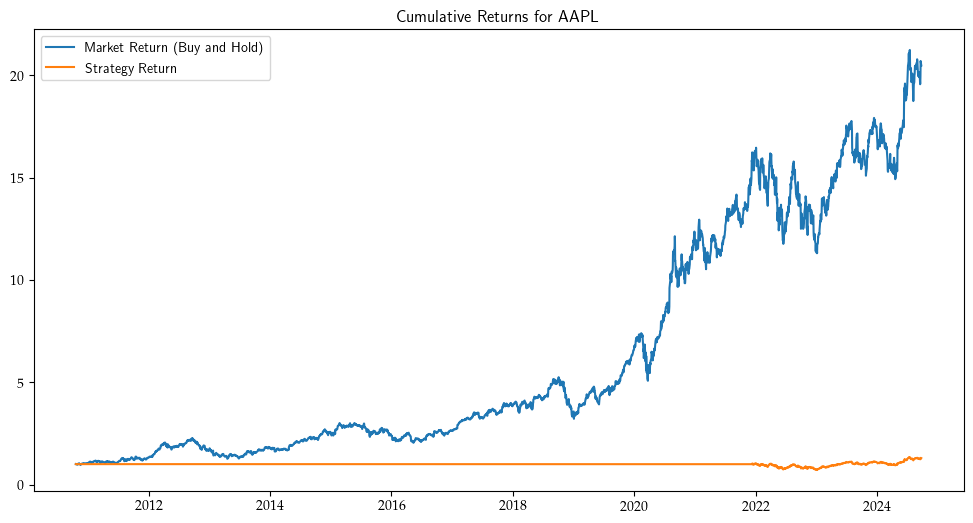

In [82]:
# Visualize the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Market Return'], label='Market Return (Buy and Hold)')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.legend()
plt.title(f'Cumulative Returns for {ticker}')
plt.show()

# Backtesting and Evaluation

In [83]:
# Sharpe Ratio: Risk-adjusted return
sharpe_ratio = (data['Strategy Return'].mean() / data['Strategy Return'].std()) * np.sqrt(252)
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

Sharpe Ratio: 0.21


In [84]:
# Max Drawdown: Measure the largest peak-to-trough decline
data['Peak'] = data['Cumulative Strategy Return'].cummax()
data['Drawdown'] = (data['Cumulative Strategy Return'] - data['Peak']) / data['Peak']
max_drawdown = data['Drawdown'].min()
print(f'Max Drawdown: {max_drawdown:.2%}')

Max Drawdown: -31.31%
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=4, min_s

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_est

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estima